### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

Dataset contains 12684 rows and 26 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    obj

/var/folders/zn/342gd36j035f5s0449_1zb_m0000gq/T/ipykernel_97681/260489002.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.values, y=missing.index, palette='crest')


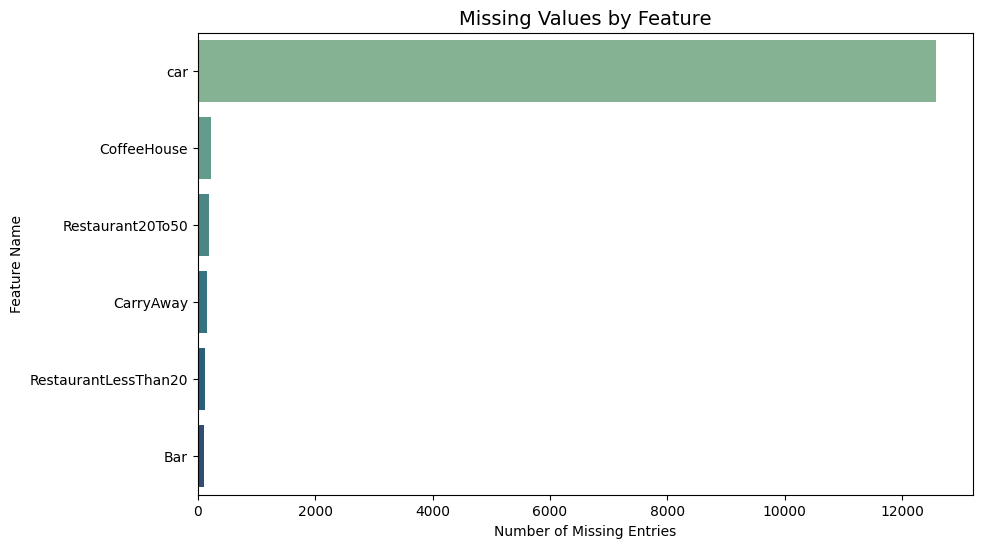

In [6]:
# Check the shape of the dataset
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.\n")

# Display basic information about each column
data.info()

# Check for missing values in each column
missing_values = data.isnull().sum()
print("\nMissing values per column:\n", missing_values[missing_values > 0])

# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}\n")

# View summary statistics for numeric columns
data.describe(include='all').T

# Bar plot of missing values
missing = data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=missing.values, y=missing.index, palette='crest')
plt.title('Missing Values by Feature', fontsize=14)
plt.xlabel('Number of Missing Entries')
plt.ylabel('Feature Name')
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
# Copy dataset to preserve original
clean_data = data.copy()

# Define mapping for frequency-based columns
frequency_map = {
    'never': 0,
    'less1': 0,
    '1~3': 2,      # average of 1 and 3
    '4~8': 6,      # average of 4 and 8
    'gt8': 10      # approximate upper bound
}

# List of columns where this mapping applies
freq_cols = ['Bar', 'CoffeeHouse', 'CarryAway', 
             'RestaurantLessThan20', 'Restaurant20To50']

# Apply the mapping
for col in freq_cols:
    clean_data[col] = clean_data[col].replace(frequency_map)

# Convert these columns to numeric type (some might still be strings)
clean_data[freq_cols] = clean_data[freq_cols].apply(pd.to_numeric, errors='coerce')

# Handle other missing numeric data: replace NaN with column mean
clean_data[freq_cols] = clean_data[freq_cols].fillna(clean_data[freq_cols].mean())

# Check if any NaN remain
print(clean_data[freq_cols].isnull().sum())

# Compare before vs after cleaning for one column
print("Before Cleaning:\n", data['Bar'].value_counts(dropna=False))
print("\nAfter Cleaning:\n", clean_data['Bar'].value_counts(dropna=False))

Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
dtype: int64
Before Cleaning:
 Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
NaN       107
Name: count, dtype: int64

After Cleaning:
 Bar
0.000000     8679
2.000000     2473
6.000000     1076
10.000000     349
1.184066      107
Name: count, dtype: int64


/var/folders/zn/342gd36j035f5s0449_1zb_m0000gq/T/ipykernel_97681/2815447761.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_data[col] = clean_data[col].replace(frequency_map)


4. What proportion of the total observations chose to accept the coupon?



Proportion of customers who accepted the coupon: 0.57


/var/folders/zn/342gd36j035f5s0449_1zb_m0000gq/T/ipykernel_97681/4285858567.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Y', data=data, palette='viridis')


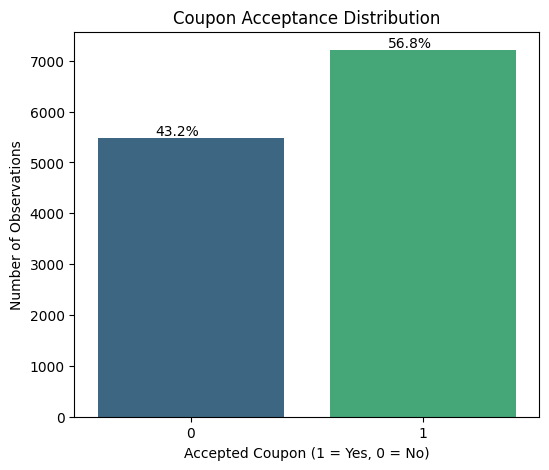

In [8]:
# Proportion of customers who accepted the coupon
acceptance_rate = data['Y'].mean()
print(f"Proportion of customers who accepted the coupon: {acceptance_rate:.2f}")

# Visualization
plt.figure(figsize=(6,5))
sns.countplot(x='Y', data=data, palette='viridis')
plt.title('Coupon Acceptance Distribution')
plt.xlabel('Accepted Coupon (1 = Yes, 0 = No)')
plt.ylabel('Number of Observations')

total = len(data)
for p in plt.gca().patches:
    percentage = f"{100 * p.get_height() / total:.1f}%"
    plt.gca().annotate(percentage, (p.get_x() + 0.25, p.get_height() + 50))
plt.show()

5. Use a bar plot to visualize the `coupon` column.

Coupon Types and Counts:
 coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


/var/folders/zn/342gd36j035f5s0449_1zb_m0000gq/T/ipykernel_97681/1469063741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='coupon', order=data['coupon'].value_counts().index, palette='Set2')


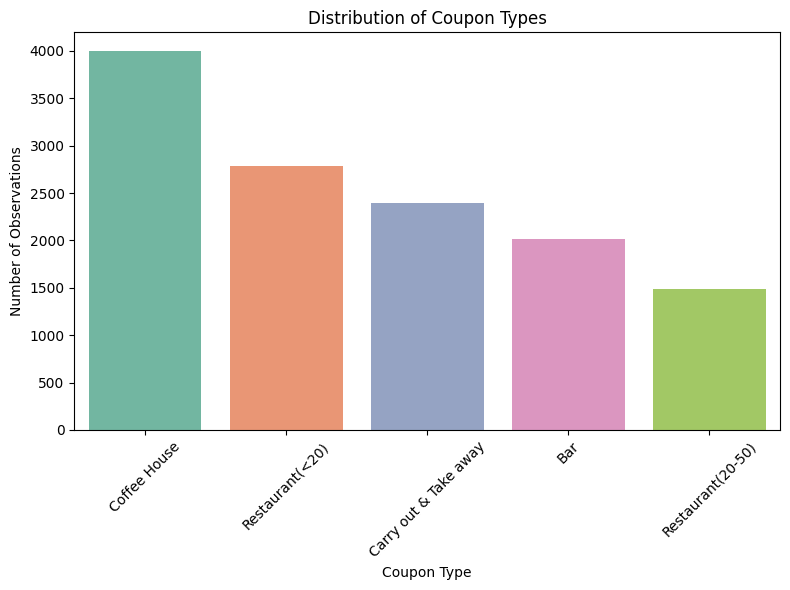

In [9]:
# Check unique coupon types
print("Coupon Types and Counts:\n", data['coupon'].value_counts())

# Bar plot of coupon types
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='coupon', order=data['coupon'].value_counts().index, palette='Set2')

plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

Unique temperature values: [55 80 30]


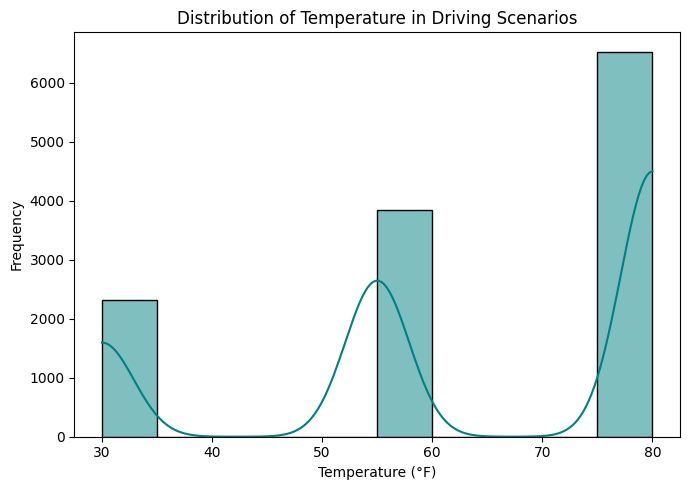

In [10]:
# View unique temperature values (to check data type and range)
print("Unique temperature values:", data['temperature'].unique())

# Plot histogram
plt.figure(figsize=(7,5))
sns.histplot(data['temperature'], bins=10, kde=True, color='teal')

plt.title('Distribution of Temperature in Driving Scenarios')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

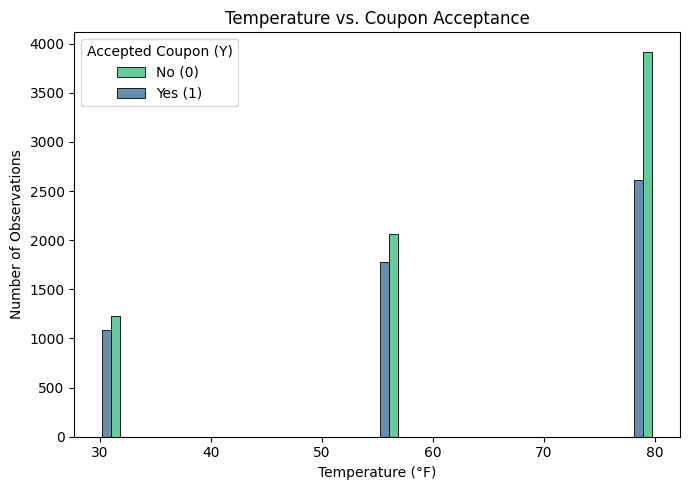

In [12]:
#Temperature Distribution by Coupon Acceptance (Y)

plt.figure(figsize=(7,5))
sns.histplot(data=data, x='temperature', hue='Y', multiple='dodge', shrink=0.8, palette='viridis')

plt.title('Temperature vs. Coupon Acceptance')
plt.xlabel('Temperature (°F)')
plt.ylabel('Number of Observations')
plt.legend(title='Accepted Coupon (Y)', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()

/var/folders/zn/342gd36j035f5s0449_1zb_m0000gq/T/ipykernel_97681/114399238.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Coupon Type', bbox_to_anchor=(1.05, 1), loc='upper left')


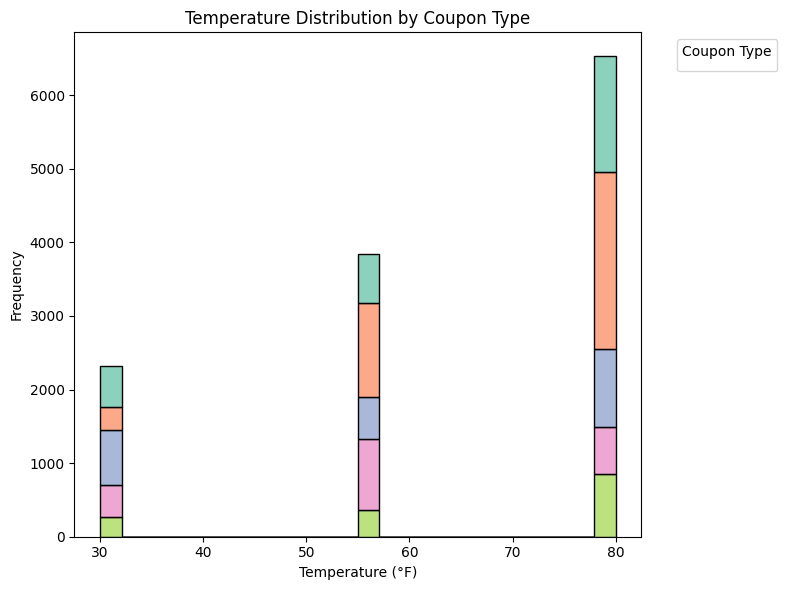

In [13]:
#Temperature Distribution by Coupon Type
plt.figure(figsize=(8,6))
sns.histplot(data=data, x='temperature', hue='coupon', multiple='stack', palette='Set2')

plt.title('Temperature Distribution by Coupon Type')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.legend(title='Coupon Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
# Create a new DataFrame with only 'Bar' coupons
bar_coupons = data[data['coupon'] == 'Bar']

# Preview data
bar_coupons.head()

# Check the number of records
print(f"Number of records with Bar coupons: {bar_coupons.shape[0]}")

Number of records with Bar coupons: 2017


2. What proportion of bar coupons were accepted?


In [15]:
# Compute acceptance rate for bar coupons
bar_acceptance_rate = bar_coupons['Y'].mean()
print(f"Proportion of bar coupons accepted: {bar_acceptance_rate:.2f}")

# view both categories
bar_coupons['Y'].value_counts(normalize=True)

Proportion of bar coupons accepted: 0.41


Y
0    0.589985
1    0.410015
Name: proportion, dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Acceptance rate (≤3 visits/month): 0.37
Acceptance rate (>3 visits/month): 0.77


/var/folders/zn/342gd36j035f5s0449_1zb_m0000gq/T/ipykernel_97681/2588980278.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bar_coupons['Bar'] = bar_coupons['Bar'].replace(frequency_map)
/var/folders/zn/342gd36j035f5s0449_1zb_m0000gq/T/ipykernel_97681/2588980278.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['≤3 visits/month', '>3 visits/month'],


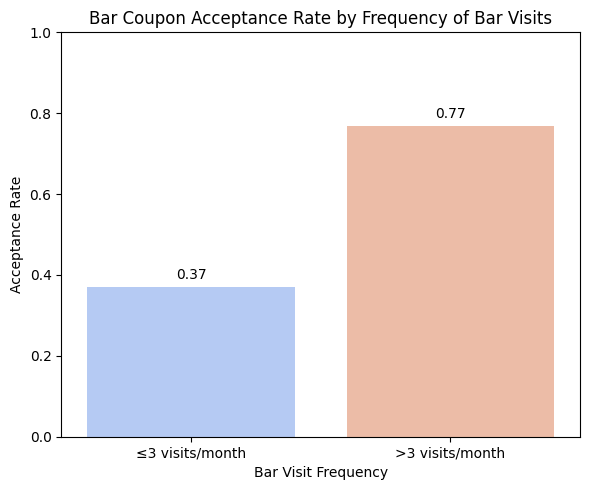

In [50]:
# Make a copy to be safe
bar_coupons = data[data['coupon'] == 'Bar'].copy()

# Map frequency strings to numeric averages
frequency_map = {
    'never': 0,
    'less1': 0,
    '1~3': 2,
    '4~8': 6,
    'gt8': 10
}

# Apply mapping to the 'Bar' column
bar_coupons['Bar'] = bar_coupons['Bar'].replace(frequency_map)

# Convert to numeric (just in case)
bar_coupons['Bar'] = pd.to_numeric(bar_coupons['Bar'], errors='coerce')

# Define groups
less_or_equal_3 = bar_coupons[bar_coupons['Bar'] <= 3]
more_than_3 = bar_coupons[bar_coupons['Bar'] > 3]

# Calculate acceptance rates
accept_less_equal_3 = less_or_equal_3['Y'].mean()
accept_more_than_3 = more_than_3['Y'].mean()

print(f"Acceptance rate (≤3 visits/month): {accept_less_equal_3:.2f}")
print(f"Acceptance rate (>3 visits/month): {accept_more_than_3:.2f}")

# visualization
plt.figure(figsize=(6,5))
sns.barplot(x=['≤3 visits/month', '>3 visits/month'], 
            y=[accept_less_equal_3, accept_more_than_3], 
            palette='coolwarm')

plt.title('Bar Coupon Acceptance Rate by Frequency of Bar Visits')
plt.ylabel('Acceptance Rate')
plt.xlabel('Bar Visit Frequency')
plt.ylim(0, 1)
for i, val in enumerate([accept_less_equal_3, accept_more_than_3]):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center')
plt.tight_layout()
plt.show()

# In this question I experienced errors due to the Bar column, the values are strings such as 'never', 'less1', '1~3', '4~8', 'gt8', or even NaN.
# When I try to convert these directly with pd.to_numeric(), pandas will set them to NaN (because it can’t interpret text ranges as numbers).
# So my comparisons (<= 3 or > 3) end up being invalid or empty, causing plotting or aggregation errors.
# fix: first map the string values to their numeric equivalents

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Acceptance rate - Bar >1/mo & Age >25: 0.70
Acceptance rate - All others: 0.34


/var/folders/zn/342gd36j035f5s0449_1zb_m0000gq/T/ipykernel_97681/287717071.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bar_coupons['Bar'] = bar_coupons['Bar'].replace(frequency_map)
/var/folders/zn/342gd36j035f5s0449_1zb_m0000gq/T/ipykernel_97681/287717071.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bar_coupons['age'] = bar_coupons['age'].replace(age_map)
/var/folders/zn/342gd36j035f5s0449_1zb_m0000gq/T/ipykernel_97681/287717071.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and w

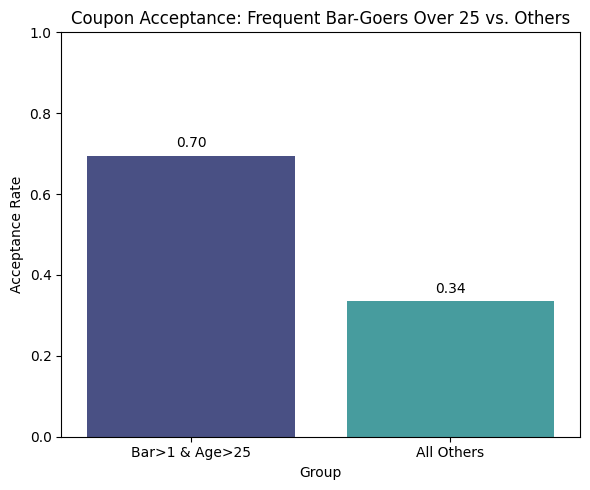

In [49]:
# Copy to avoid warnings
bar_coupons = data[data['coupon'] == 'Bar'].copy()

# Frequency map for 'Bar' column
frequency_map = {
    'never': 0,
    'less1': 0,
    '1~3': 2,
    '4~8': 6,
    'gt8': 10
}
bar_coupons['Bar'] = bar_coupons['Bar'].replace(frequency_map)
bar_coupons['Bar'] = pd.to_numeric(bar_coupons['Bar'], errors='coerce')

# Map age strings to numeric midpoints
age_map = {
    'below21': 20,
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 50
}
bar_coupons['age'] = bar_coupons['age'].replace(age_map)
bar_coupons['age'] = pd.to_numeric(bar_coupons['age'], errors='coerce')

# Define group: frequent bar-goers over 25
group_1 = bar_coupons[(bar_coupons['Bar'] > 1) & (bar_coupons['age'] > 25)]

# Define comparison group: all others
group_2 = bar_coupons[~((bar_coupons['Bar'] > 1) & (bar_coupons['age'] > 25))]

# Calculate acceptance rates
accept_group_1 = group_1['Y'].mean()
accept_group_2 = group_2['Y'].mean()

print(f"Acceptance rate - Bar >1/mo & Age >25: {accept_group_1:.2f}")
print(f"Acceptance rate - All others: {accept_group_2:.2f}")

# visualizing for better understanding
plt.figure(figsize=(6,5))
sns.barplot(x=['Bar>1 & Age>25', 'All Others'],
            y=[accept_group_1, accept_group_2],
            palette='mako')

plt.title('Coupon Acceptance: Frequent Bar-Goers Over 25 vs. Others')
plt.ylabel('Acceptance Rate')
plt.xlabel('Group')
plt.ylim(0, 1)
for i, val in enumerate([accept_group_1, accept_group_2]):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center')
plt.tight_layout()
plt.show()

# Here I experienced errors for teh age column, this column is stored as string and I need to map teh age column to numeric midpoints.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [48]:
# Ensure 'bar' is numeric
frequency_map = {
    'never': 0,
    'less1': 0,
    '1~3': 2,
    '4~8': 6,
    'gt8': 10
}
bar_coupons['bar'] = bar_coupons['bar'].replace(frequency_map)
bar_coupons['bar'] = pd.to_numeric(bar_coupons['bar'], errors='coerce')

# Define group: frequent bar-goers, no kid passengers, and occupation not farming/fishing/forestry
group_1 = bar_coupons[
    (bar_coupons['bar'] > 1) &
    (bar_coupons['passanger'] != 'Kid(s)') &
    (~bar_coupons['occupation'].isin(['Farming', 'Fishing', 'Forestry']))
]

# Comparison group: all others
group_2 = bar_coupons[~(
    (bar_coupons['bar'] > 1) &
    (bar_coupons['passanger'] != 'Kid(s)') &
    (~bar_coupons['occupation'].isin(['Farming', 'Fishing', 'Forestry']))
)]

# Calculate acceptance rates
accept_group_1 = group_1['y'].mean()
accept_group_2 = group_2['y'].mean()

print(f"Acceptance rate - Bar>1/mo, Passenger≠Kid, Occupation≠FFF: {accept_group_1:.2f}")
print(f"Acceptance rate - All others: {accept_group_2:.2f}")

#In this section I experienced issue with the typo in the dataset. KeyError: 'passenger' means the column name in my dataset isn’t exactly "passenger" it is spelled as "passanger". I need to use the name as in dataset for this question

Acceptance rate - Bar>1/mo, Passenger≠Kid, Occupation≠FFF: 0.71
Acceptance rate - All others: 0.30


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [46]:
# Condition 1: go to bars more than once a month, passengers not kid(s), and not widowed
cond1 = bar_coupons[
    (bar_coupons['bar'] > 1) &
    (bar_coupons['passanger'] != 'Kid(s)') &
    (bar_coupons['maritalstatus'] != 'Widowed')
]
cond1_accept = cond1['y'].mean()
print(f"Condition 1 (Bar>1, Non-kid passenger, Not widowed): {cond1_accept:.2f}")

# Condition 2: go to bars more than once a month and are under age 30
cond2 = bar_coupons[
    (bar_coupons['bar'] > 1) &
    (bar_coupons['age'] < 30)
]
cond2_accept = cond2['y'].mean()
print(f"Condition 2 (Bar>1 and Age<30): {cond2_accept:.2f}")

# Condition 3: go to cheap restaurants >4 times a month and income < 50K
cond3 = bar_coupons[
    (bar_coupons['restaurantlessthan20'] > 4) &
    (bar_coupons['income'] < 50000)
]
cond3_accept = cond3['y'].mean()
print(f"Condition 3 (Cheap restaurants>4 and Income<50K): {cond3_accept:.2f}")

Condition 1 (Bar>1, Non-kid passenger, Not widowed): 0.71
Condition 2 (Bar>1 and Age<30): 0.72
Condition 3 (Cheap restaurants>4 and Income<50K): 0.44


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [47]:
# Q7. Hypothesis about drivers who accepted bar coupons

hypothesis = """
Based on the analysis of bar coupon acceptance patterns, the data suggests that:

1. Drivers who visit bars more frequently are more likely to accept bar coupons.
2. Younger drivers, particularly those under 30 years of age, tend to redeem coupons at a higher rate.
3. Drivers traveling with friends or partners (as opposed to alone or with children) are more likely to accept bar coupons.
4. Lower-income individuals show slightly higher coupon acceptance, indicating cost sensitivity.

In summary:
Bar coupon acceptance is highest among younger, socially active, and budget-conscious drivers
who already engage in social outings like visiting bars. These insights suggest that targeted
marketing toward this demographic would likely increase coupon redemption rates.
"""

print(hypothesis)


Based on the analysis of bar coupon acceptance patterns, the data suggests that:

1. Drivers who visit bars more frequently are more likely to accept bar coupons.
2. Younger drivers, particularly those under 30 years of age, tend to redeem coupons at a higher rate.
3. Drivers traveling with friends or partners (as opposed to alone or with children) are more likely to accept bar coupons.
4. Lower-income individuals show slightly higher coupon acceptance, indicating cost sensitivity.

In summary:
Bar coupon acceptance is highest among younger, socially active, and budget-conscious drivers
who already engage in social outings like visiting bars. These insights suggest that targeted
marketing toward this demographic would likely increase coupon redemption rates.



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Overall acceptance rate for Coffee House coupons: 0.50

Acceptance rate by passenger type:
 passanger
Friend(s)    0.596906
Partner      0.570492
Kid(s)       0.483092
Alone        0.437943
Name: Y, dtype: float64


/var/folders/zn/342gd36j035f5s0449_1zb_m0000gq/T/ipykernel_97681/128306277.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  coffee_coupons['CoffeeHouse'] = coffee_coupons['CoffeeHouse'].replace(frequency_map)
/var/folders/zn/342gd36j035f5s0449_1zb_m0000gq/T/ipykernel_97681/128306277.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accept_by_passenger.index, y=accept_by_passenger.values, palette='viridis')


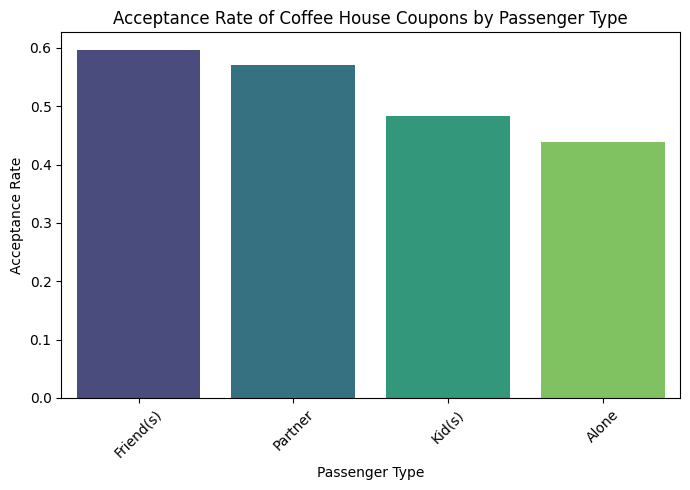

In [ ]:
# Using the same analytical approach as for bar coupons, the dataset was filtered to include only Coffee House coupons.
# Filter data for Coffee House coupons
coffee_coupons = data[data['coupon'] == 'Coffee House'].copy()

# Map frequency categories to numeric values
frequency_map = {
    'never': 0,
    'less1': 0,
    '1~3': 2,
    '4~8': 6,
    'gt8': 10
}

# Convert 'CoffeeHouse' column to numeric
coffee_coupons['CoffeeHouse'] = coffee_coupons['CoffeeHouse'].replace(frequency_map)
coffee_coupons['CoffeeHouse'] = pd.to_numeric(coffee_coupons['CoffeeHouse'], errors='coerce')

# Calculate overall acceptance rate
coffee_accept = coffee_coupons['Y'].mean()
print(f"Overall acceptance rate for Coffee House coupons: {coffee_accept:.2f}")

# Calculate acceptance rate by passenger type
accept_by_passenger = coffee_coupons.groupby('passanger')['Y'].mean().sort_values(ascending=False)
print("\nAcceptance rate by passenger type:\n", accept_by_passenger)

# Plot
plt.figure(figsize=(7,5))
sns.barplot(x=accept_by_passenger.index, y=accept_by_passenger.values, palette='viridis')
plt.title('Acceptance Rate of Coffee House Coupons by Passenger Type')
plt.xlabel('Passenger Type')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()